## Where We Left Off

* US Census Population Data 2010-2015
* Compared differences in population from 2010-2015
    * Lots more 68 y.o. possibly because of WW2
* Now analyzing gender ratios in 2015
    * More male infants, but more female overall

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from datascience import *
census = Table.read_table('census.csv')
only_2015 = census.select('SEX', 'AGE', 'POPESTIMATE2015').relabel('POPESTIMATE2015', '2015')
only_2015

SEX,AGE,2015
0,0,3978038
0,1,3968564
0,2,3966583
0,3,3974061
0,4,4020035
0,5,4018158
0,6,4019207
0,7,4148360
0,8,4167887
0,9,4133564


In [2]:
# Get an array of all the females in 2015
females = only_2015.where('SEX', 2).column('2015')

# Get an array of all the males in 2015
males = only_2015.where('SEX', 1).column('2015')
# Calculate female to male ratio
fm_ratio = females/males
# If use .size, we'll see that 'females', 'males' and 'fm_ratio' are all arrays of size 102

In [3]:
# Now create a table where it's only females' age, and take the array of that
only_f_table = only_2015.where('SEX', 2)
female_ages = only_f_table.column('AGE')
# If we also use .size, we'll also see that female_ages is also an array of size 102!

In [4]:
# Now we can create a table of age vs. F:M ration
ratio_table = Table().with_columns(
'Age',female_ages,
'Ratio', fm_ratio)
ratio_table # Note that this table still include age 999.
ratios = ratio_table.where('Age', are.not_equal_to(999))
ratios

Age,Ratio
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


From the table above, we see that for early age, the ratio is less than 1. This implies that there were more male infants! Why there are more females in total population overall then?

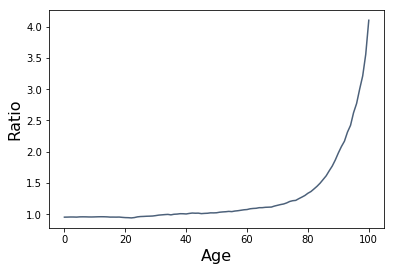

In [5]:
ratios.plot('Age')

From plot above, we see that at early age, there are more male than female. However, as the age range gets older, there are significantly more females than males!

## Data Visualization

<img src= 'smartphone.JPG' width = 350/>

Which of the following questions can be answered with this chart?
Among survey responders...
* What proportion did **not** use their phone for **online banking**?
    * Ans: Yes. Just calculate 100 - % of people who do online banking
* What proportion either used their phone for **online banking** or to **look up real estate listings**?
    * Ans: Can't be answered. We don't know the percentage of people who do both.
    * There is possibility that people who do online banking also do real estate, or vice versa
* Did everyone use their phone for at least one of these activities?
    * Ans: Can't be answered
* Did anyone use their phone for both **online banking** and **real estate**?
    * Ans: Can't be answered


## Area Principle

Areas should be proportional to the values they represent
<img src = 'area.jpg'/>
If you look at the size of the car that represents male vs. the size of the car that represents female, it seems as if the male car is twice as big as the size of female car. This plot is misleading because it makes it seem that the are twice as much accidents caused by male driver.

# Visualization

A picture is worth a thousand numbers.
Tables are a powerful way of organizing and visualizing data. However, large tables of numbers can be difficult to interpret. Sometimes it is much easier to interpret graphs than numbers.

Here, the table **actors** contain data on Holywood actors, both male and female.

| Column | Definition |
| ------ | -------- |
| Actor  | Name of Actor |
| Total Gross  | Total gross domestic box office receipt, in millions of dollars, of all of the actor's movies |
| Number of Movies  | The number of movies the actor has been in |
| Average per Movie  | Total gross divided by number of movies |
| #1 Movie  | The highest grossing movie the actor has been in |
| Gross  | Gross domestic box office receipt, in millions of dollars, of the actor's #1 Movie |

In [6]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


### Scatter Plots
A scatter plot displays the relation between two numerical variables. We saw an early example of a scatter plot when analyzing the number of periods and characters in 'Little Women'.

The Table method scatter draws a scatter plot consisting of **one point for each row of the table**.
* 1st argument: Label on the horizontal axis (x-axis)
* 2nd argument: Label on the vertical axis (y-axis)

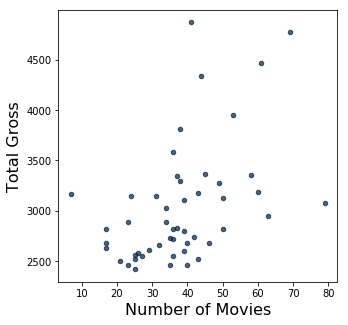

In [7]:
actors.scatter('Number of Movies', 'Total Gross')

The plot contains 50 points, one point for each actor in the table. 
We can see the following trend **IN GENERAL**:
* The slope is upwards
* The more movies an actor has been in, the more the total gross of all of the movies
You can see that it slopes upwards, in general. The more movies an actor has been in, the more the total gross of all of those movies – in general.

Of course there are variabilities.
* Some actors have high numbers of movies but middling total gross receipts. 
* Others have middling numbers of movies but high receipts. 
"The association is positive" is simply a statement about the broad general trend.

Now let's turn our attention to how **Number of Movies** is related to **Average gross receipt per movie**.

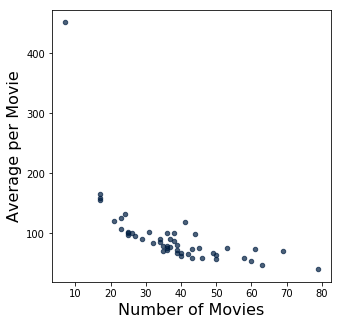

In [8]:
actors.scatter('Number of Movies', 'Average per Movie')

The plot above shows a **negative** association. In general, the more movies an actor has been in, the less the average receipt per movie.

Notice one of the points is high and off to the left of the plot. It corresponds to one actor who has a low number of movies but high average per movie. This point is an **outlier**: it lies outside the general range of the data. 

For now, we'll examine the negative association further by zooming in the main body of the plot.

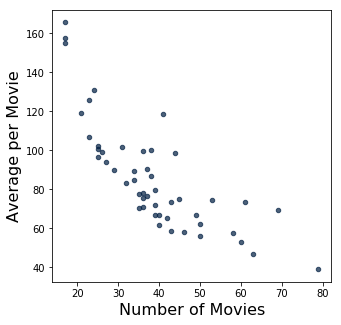

In [10]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

We still see that the negative association (trend) is still visible
Now let's analyze the actors that are at the right hand side spectrum of the plot.

In [11]:
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


Robert DeNiro has the highest **Number of Movies** and the lowest **Average per Movie**. Other fine actors are not that far off either.

To understand the negative association, note that the more movies an actor is in, the more variable those movies might be, in terms of style, genre, and box office draw. For example, an actor might be in some high-grossing action movies or comedies (such as Meet the Fockers), but also in many smaller films that may be excellent but don’t draw large crowds. Thus the actor’s value of average receipts per movie might be relatively low.

Now we're going to analyze the outlier.

In [12]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


Anthony Daniels might not be as famous as Robert DeNiro, but his 7 movies had an astonishingly high average receipt of nearly $452 million per movie
<img src = 'C_3PO.png'/>
This is Anthony Daniels playing the metallic character C-3PO. His entire filmography consists of movies in the high-grossing Star Wars franchise. This explains his low number of movies but high average receipt.

Variables such as **genre** and **production** budget have an effect on the association between the **number of movies** and the **average receipt per movie**. This example is a reminder that studying the association between two variables often involves understanding other related variables as well.

### Line Graphs
Line graphs are among the most common visualizations and are often used to study chronological trends and patterns.

The following table **movies_by_year** contains data on movies produced by U.S. studios in each of the years 1980 through 2015.

| Column | Definition |
| ------ | -------- |
| Total Gross  | Total gross domestic box office receipt, in millions of dollars, of all of the movies released |
| Number of Movies  | Number of movies released |
| #1 Movie  | Highest grossing movie |

In [16]:
movies_by_year = Table.read_table('movies_by_year.csv')
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


The Table method plot produces a line graph. Its two arguments are the same as those for **scatter**. Here is a line graph of the number of movies released each year over the years 1980 through 2015.